In [20]:
import pandas as pd
import yfinance as yf
import seaborn as sns
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from datetime import date
d2 = date.today() - timedelta(days=200)
d2 = d2.strftime("%Y-%m-%d")
plt.rcParams['figure.figsize'] = [20, 10]

In [21]:
def lines():
    for y, color, linestyle in [(0, 'black', '-'),
                                (1.0, 'green', '-'),
                                (2.5, 'green', '--'),
                                (3, 'magenta', '--'),
                                (-1.0, 'red', '--'),
                                (-2.5, 'red', '--'),
                                (-3, 'magenta', '--')]:
        plt.axhline(y=y, color=color, linestyle=linestyle)

In [22]:
path =r'/Users/aashi/Documents/Wall-Street-Sessions/ind_nifty500list.csv'
tickers=pd.read_csv(path)
tickers['Symbol']=tickers['Symbol']+str('.NS')
download=(tickers['Symbol'].to_list())

In [23]:
df=yf.download(tickers=download,start=d2)['Close']

[*********************100%***********************]  501 of 501 completed

2 Failed downloads:
['DUMMYITC.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['JSWENERGY.NS']: ChunkedEncodingError(ProtocolError('Connection broken: IncompleteRead(2595 bytes read, 856 more expected)', IncompleteRead(2595 bytes read, 856 more expected)))


In [24]:
df.pct_change()
corr = df2.corr()
corr.index.name = None  # Temporarily remove the index name
corr_long = corr.stack().reset_index()  # Now stack and reset index
corr_long.columns = ['stock1', 'stock2', 'correlation']  # Rename columns for clarity

# Optionally, drop duplicate pairs (if you want unique pairs)
corr_long = corr_long[corr_long['stock1'] < corr_long['stock2']]

# Display the long format DataFrame
print("\nLong Format Correlation DataFrame:")
print(corr_long)

/var/folders/xj/4mvtqrh126x0tyj_df2t96jc0000gn/T/ipykernel_2475/3640099411.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df.pct_change()



Long Format Correlation DataFrame:
               stock1        stock2  correlation
1           360ONE.NS    3MINDIA.NS     0.156296
2           360ONE.NS  AADHARHFC.NS     0.162079
3           360ONE.NS   AARTIIND.NS     0.272721
4           360ONE.NS      AAVAS.NS     0.136204
5           360ONE.NS        ABB.NS     0.246328
...               ...           ...          ...
248498  ZENSARTECH.NS     ZOMATO.NS     0.321511
248499  ZENSARTECH.NS  ZYDUSLIFE.NS     0.307373
248998   ZFCVINDIA.NS     ZOMATO.NS     0.140972
248999   ZFCVINDIA.NS  ZYDUSLIFE.NS     0.133182
249499      ZOMATO.NS  ZYDUSLIFE.NS     0.172317

[124750 rows x 3 columns]


<Axes: xlabel='Ticker'>

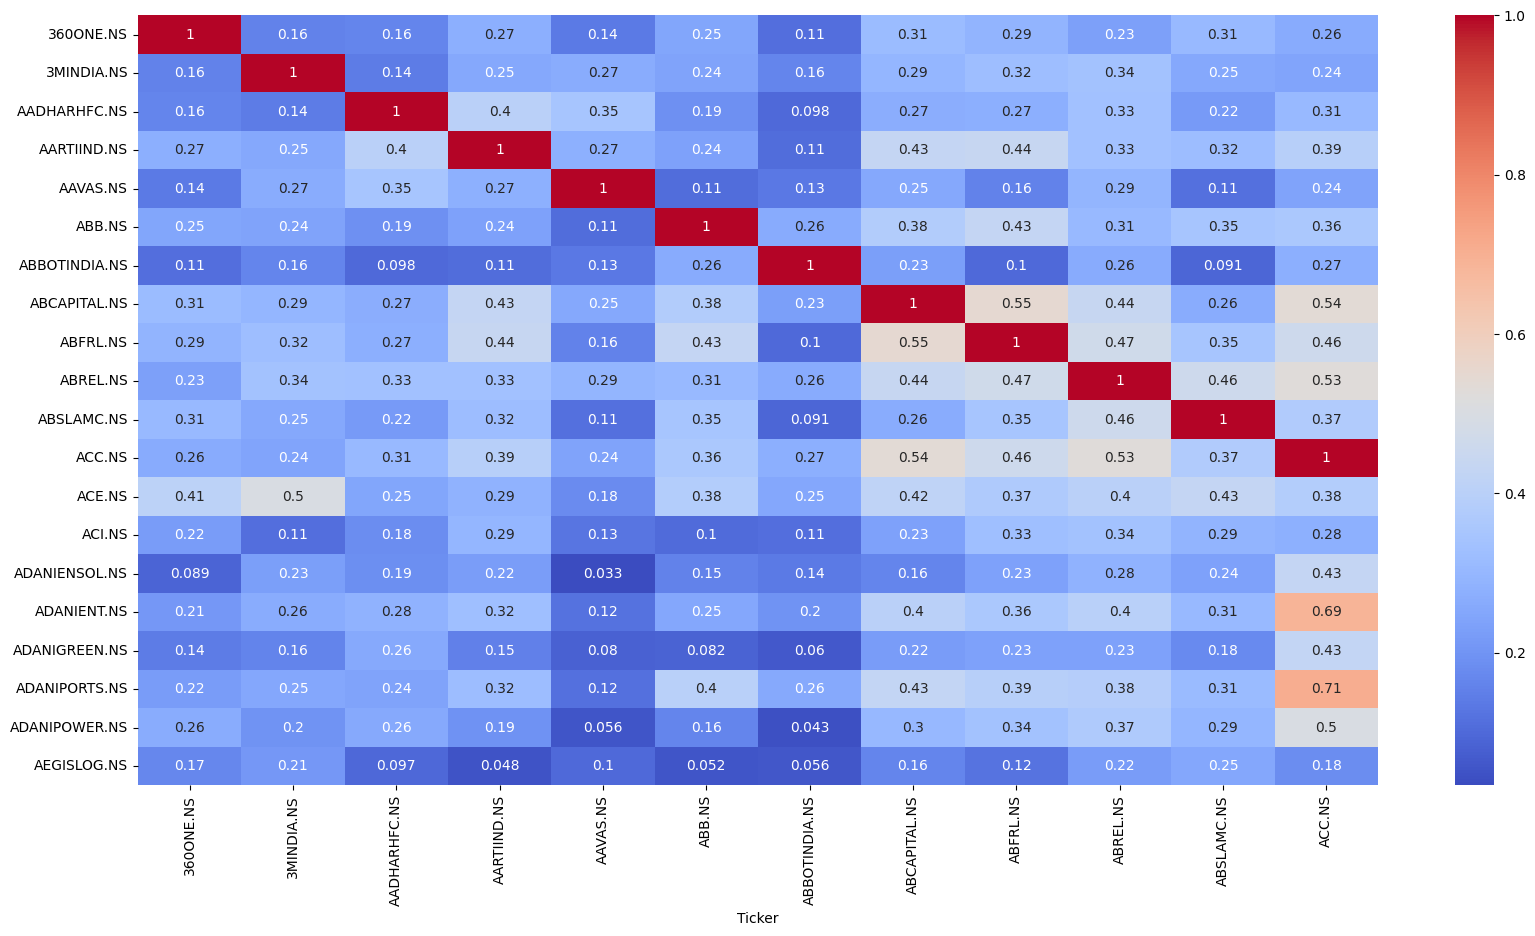

In [25]:
##Visualizing the correlation matrix

sns.heatmap(corr.iloc[:20, :12]
, annot=True, cmap='coolwarm')

In [26]:
##The final dataframe without repetitions
Finale=corr_long.loc[corr_long['correlation']!=1]
Finale=Finale.sort_values(by='correlation', ascending=False)
Finale=Finale.drop_duplicates('correlation')

In [27]:
##Selecting stocks with atleast 0.5 corrcoef value

Finale=Finale.loc[Finale['correlation']>0.5]

In [28]:
Finale

,stock1,stock2,correlation
118471,IOB.NS,UCOBANK.NS,0.912870
181392,PFC.NS,RECLTD.NS,0.912683
48736,CENTRALBK.NS,IOB.NS,0.910854
48971,CENTRALBK.NS,UCOBANK.NS,0.903507
30088,BANKBARODA.NS,CANBK.NS,0.891423
...,...,...,...
63943,DALBHARAT.NS,TATACOMM.NS,0.500109
151411,MAHABANK.NS,SBIN.NS,0.500070
87278,GNFC.NS,KIRLOSBROS.NS,0.500061
30213,BANKBARODA.NS,HUDCO.NS,0.500048


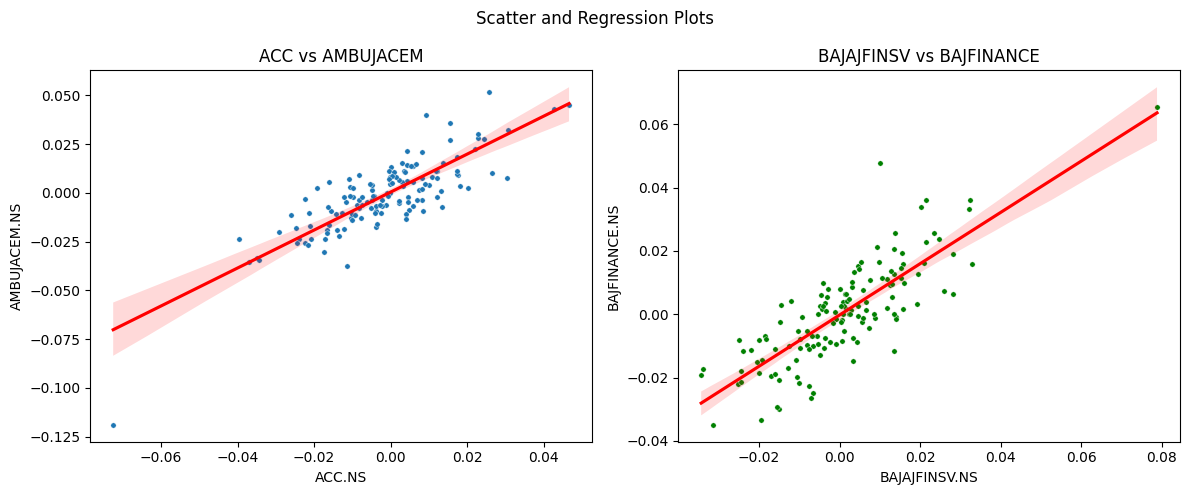

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First subplot
sns.scatterplot(x=df2['ACC.NS'], y=df2['AMBUJACEM.NS'], data=df, ax=ax1,s=15)
sns.regplot(x=df2['ACC.NS'], y=df2['AMBUJACEM.NS'], data=df, color='red', scatter=False, ax=ax1)
ax1.set_xlabel('ACC.NS')
ax1.set_ylabel('AMBUJACEM.NS')
ax1.set_title('ACC vs AMBUJACEM')

# Second subplot
sns.scatterplot(x=df2['BAJAJFINSV.NS'], y=df2['BAJFINANCE.NS'], data=df, ax=ax2,s=15,color='green')
sns.regplot(x=df2['BAJAJFINSV.NS'], y=df2['BAJFINANCE.NS'], data=df, color='red', scatter=False, ax=ax2)
ax2.set_xlabel('BAJAJFINSV.NS')
ax2.set_ylabel('BAJFINANCE.NS')
ax2.set_title('BAJAJFINSV vs BAJFINANCE')

fig.suptitle('Scatter and Regression Plots')

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
##Take the pairs and convert them to numpy arrays
stock1=np.array(df[Finale['stock1'].iloc[60]])
stock2=np.array(df[Finale['stock2'].iloc[60]])



##Correlation

correlation=(df2[Finale['stock1'].iloc[0]]).corr(df2[Finale['stock2'].iloc[0]])
##Perform Linear Regression 
reg=np.polyfit(stock1,stock2, deg=1)
reg
trend=np.polyval(reg,stock1)

##Calculate residuals for ADF test

ratio=stock1/stock2

ratio=stats.zscore(ratio)

##Perform the ADF test

from statsmodels.tsa.stattools import adfuller

series = ratio
X = series
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if(result[1]<0.05):
    print("ADF test passed")
else:
    print("ADF test failed")


ADF Statistic: -1.778117
p-value: 0.391379
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
ADF test failed
